In [3]:
#This is a program to Understand the Unemployment in Various parts of India Using Data Science

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [4]:
data=pd.read_csv("UnemploymentInIndia.csv")
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
print(data.isnull().sum())

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


In [6]:
data.columns=["States","Date","Frequency","Estimated Unemployment Rate","Estimated Employed","Estimated Labour Participation Rate","Region"]

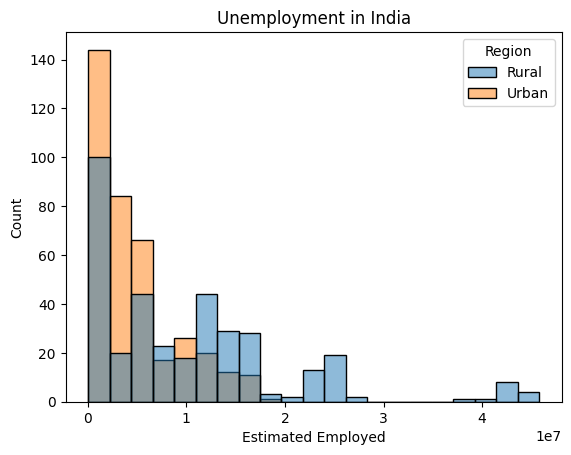

In [14]:
%matplotlib inline
data.columns=["States","Date","Frequency","Estimated Unemployment Rate","Estimated Employed","Estimated Labour Participation Rate","Region"]
plt.title("Unemployment in India")
sns.histplot(x="Estimated Employed", hue="Region", data=data)
plt.show()

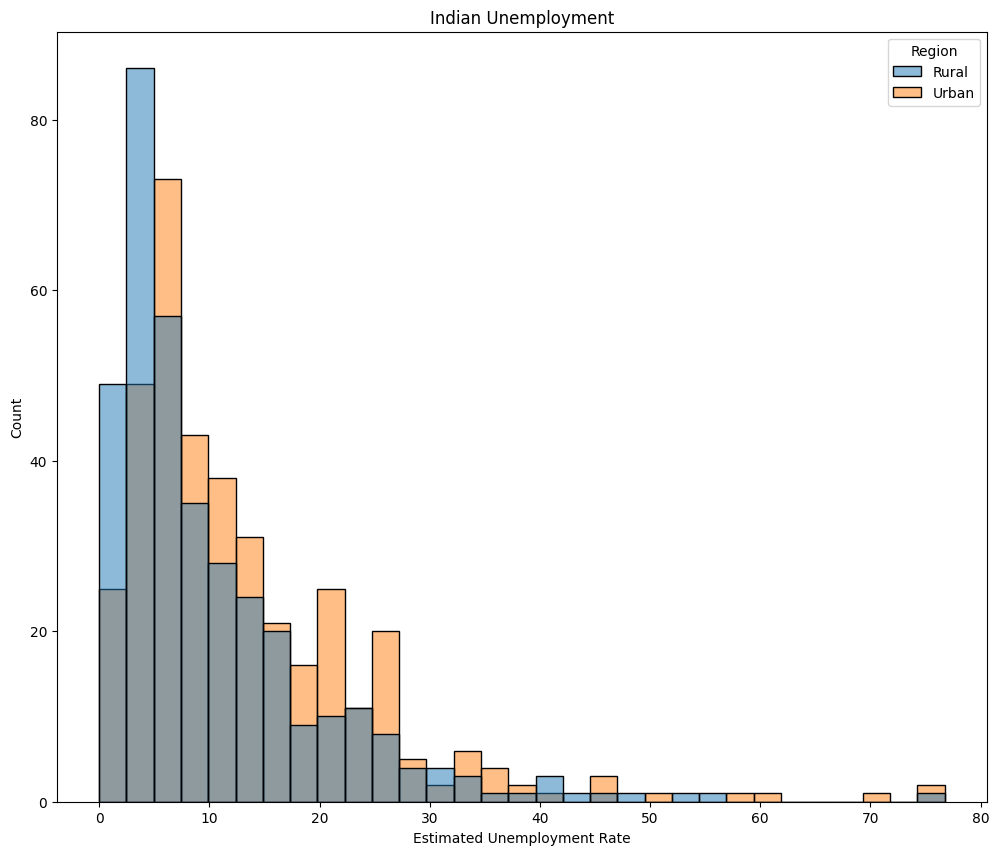

In [10]:
plt.figure(figsize=(12,10))
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Unemployment Rate",hue="Region",data=data)
plt.show()

In [21]:
data

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
data.describe()

,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [23]:
data["States"].value_counts().idxmin()

'Chandigarh'

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   States                               740 non-null    object 
 1   Date                                 740 non-null    object 
 2   Frequency                            740 non-null    object 
 3   Estimated Unemployment Rate          740 non-null    float64
 4   Estimated Employed                   740 non-null    float64
 5   Estimated Labour Participation Rate  740 non-null    float64
 6   Region                               740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 30.1+ KB


In [26]:
data.shape

(768, 7)

In [37]:
top_states=data.sort_values(by="Estimated Unemployment Rate",ascending=False)
top_states=top_states[["States","Estimated Unemployment Rate"]].drop_duplicates(subset="States")
top_states.head()

,States,Estimated Unemployment Rate
627,Puducherry,76.74
531,Jharkhand,70.17
412,Bihar,58.77
287,Tamil Nadu,53.19
507,Himachal Pradesh,50.00


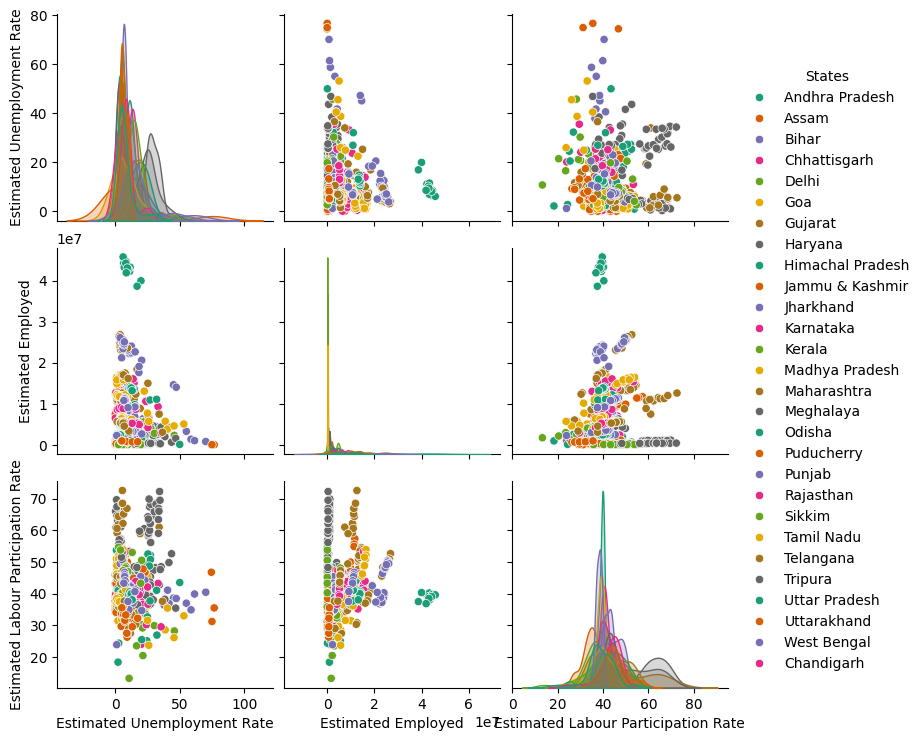

In [39]:

sns.pairplot(data, hue="States", palette="Dark2")
plt.show()

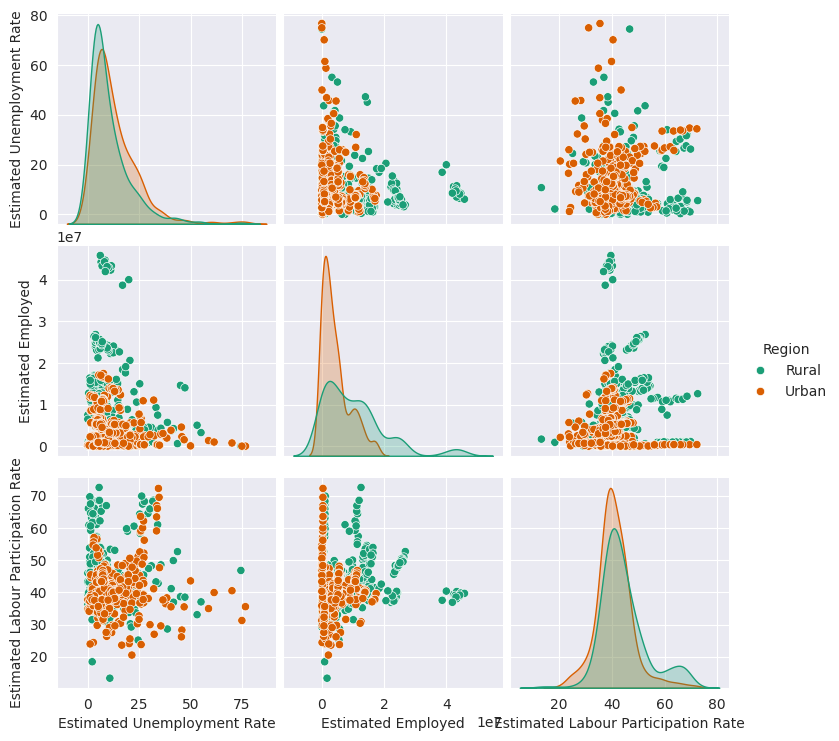

In [41]:
sns.set_style("darkgrid")
sns.pairplot(data,hue="Region",palette="Dark2")
plt.show()

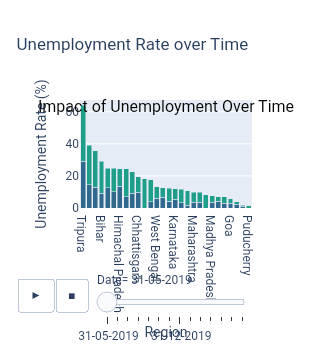

In [55]:
fig=px.bar(data,x="States",y="Estimated Unemployment Rate",color="Region",animation_frame="Date",title="Unemployment Rate over Time",labels={"Estimated Unemployment Rate","Unemployment Rate"},template="plotly",color_discrete_sequence=px.colors.sequential.Viridis,category_orders={"Region":["Region1","Region2","Region3"]})

fig.update_layout(xaxis={"categoryorder":"total descending"},xaxis_title="Region",yaxis_title="Unemployment Rate (%)",barmode="stack",showlegend=False)
fig.add_annotation(text="Impact of Unemployment Over Time",xref="paper",yref="paper",x=0.5,y=1.05,showarrow=False,font=dict(size=16,color="black"))
fig.show()